# Supervised vs unsupervised learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)
pixel_values = pixel_values.values

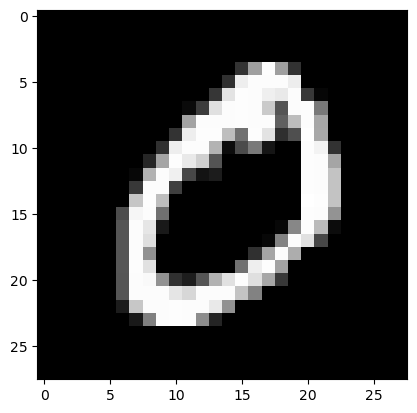

In [3]:
single_image = pixel_values[1, :].reshape(28, 28)

plt.imshow(single_image, cmap='gray');

In [4]:
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [5]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

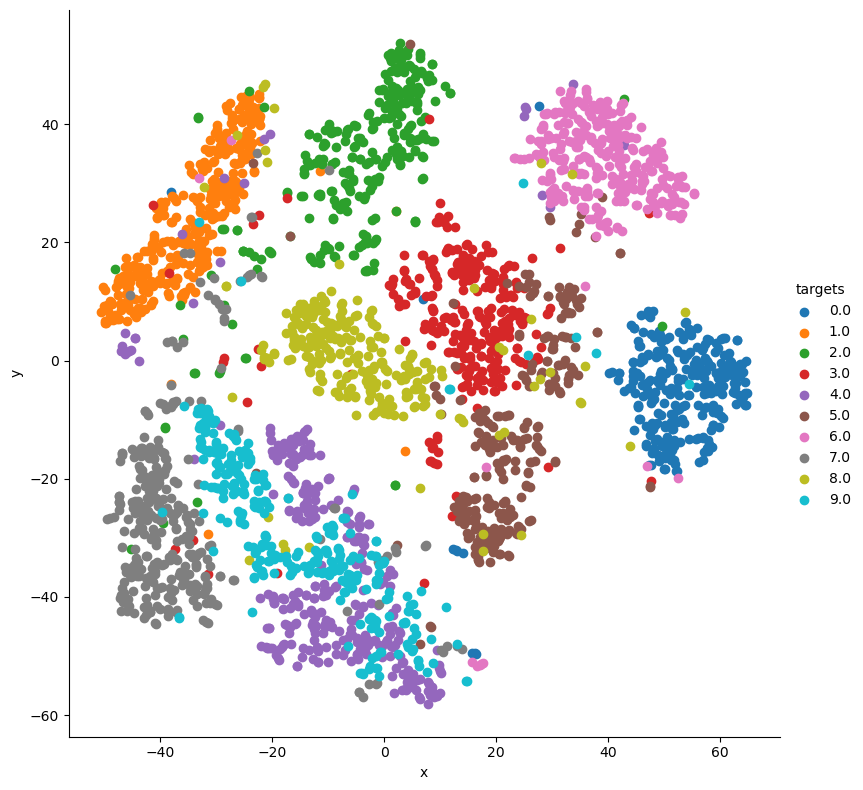

In [6]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)

grid.map(plt.scatter, "x", "y").add_legend();